In [50]:
import sys
import os
import psycopg2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
host = 'localhost'
user = 'postgres'
password = 'abcd1234'
database = 'db_annp'

os.makedirs('plots', exist_ok=True)

In [18]:
def run_query(query, host=host, user=user, password=password, database=database):
    conn = None
    cur = None
    try:
        conn = psycopg2.connect(
            host=host,
            database=database,
            user=user,
            password=password
        )

        cur = conn.cursor()
        cur.execute(query)

        return cur.fetchall()

    except Exception as e:
        sys.stderr.write(e)
    finally:
        if cur is not None:
            cur.close()
        if conn is not None:
            conn.close()

## Number of athletes by age

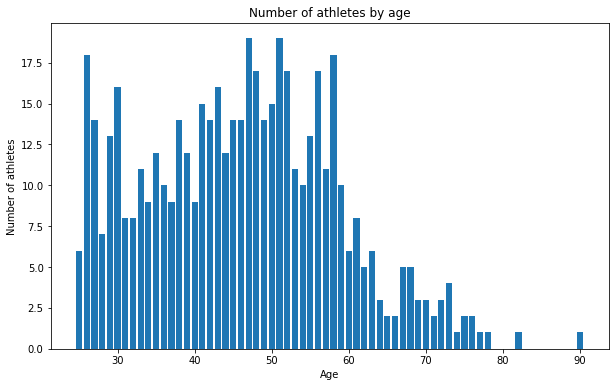

In [19]:
query = '''
SELECT COUNT(*), EXTRACT(YEAR FROM age(birthdate)) AS age
FROM annp_final.athlete
GROUP BY age
ORDER BY age ASC;
'''

res = run_query(query)

xx = list(map(lambda x: int(x[1]), res))
yy = list(map(lambda x: x[0], res))

plt.figure(figsize=(10, 6))

plt.title('Number of athletes by age')
plt.xlabel('Age')
plt.ylabel('Number of athletes')
plt.bar(xx, yy)

plt.savefig('plots/athletesbyage.png')

## Number of athletes by nation

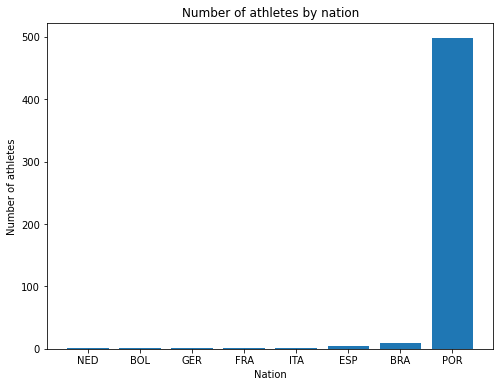

In [17]:
query = '''
SELECT nation, COUNT(*) nationCount
FROM annp_final.athlete
GROUP BY nation
ORDER BY nationCount ASC;
'''

res = run_query(query)

xx = list(map(lambda x: x[0], res))
yy = list(map(lambda x: x[1], res))

plt.figure(figsize=(8, 6))

plt.title('Number of athletes by nation')
plt.xlabel('Nation')
plt.ylabel('Number of athletes')
plt.bar(xx, yy)

plt.savefig('plots/athletesbynation.png')

## Number of atheletes by nation and gender

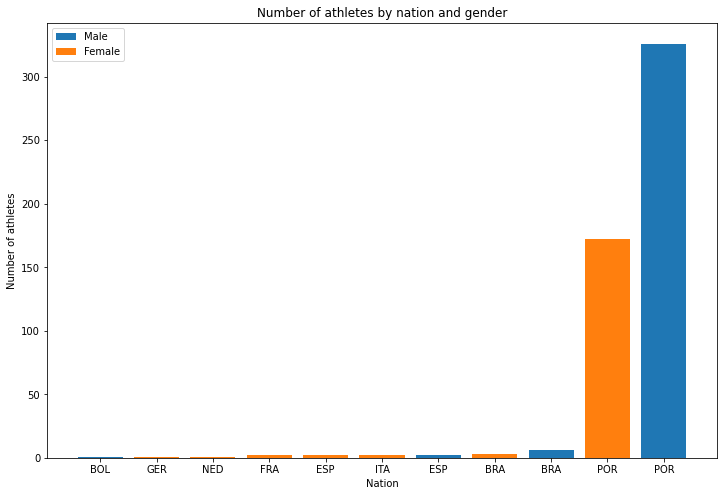

In [86]:
query = '''
SELECT nation, COUNT(*) AS nationCount, gender
FROM annp_final.athlete
GROUP BY (nation, gender)
ORDER BY nationCount ASC;
'''

res = run_query(query)

xx = list(map(lambda x: x[0], res))
m = list(map(lambda x: x[1] if x[2] == 'M' else 0, res))
f = list(map(lambda x: x[1] if x[2] == 'F' else 0, res))
x_axis = np.arange(len(xx))


plt.figure(figsize=(12, 8))

plt.title('Number of athletes by nation and gender')
plt.xlabel('Nation')
plt.ylabel('Number of athletes')

plt.bar(x_axis, m, label='Male')
plt.bar(x_axis, f, label='Female')

plt.xticks(x_axis, xx)

plt.legend()

plt.savefig('plots/athletesbynationgender.png')


## Number of athletes by gender

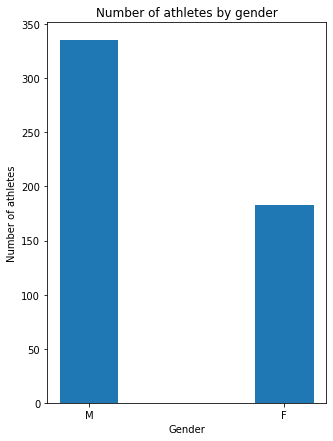

In [20]:
query = '''
SELECT COUNT(*), gender
FROM annp_final.athlete
GROUP BY gender;
'''

res = run_query(query)

xx = list(map(lambda x: x[1], res))
yy = list(map(lambda x: x[0], res))

plt.figure(figsize=(5, 7))

plt.title('Number of athletes by gender')
plt.xlabel('Gender')
plt.ylabel('Number of athletes')
plt.bar(xx, yy, width=.3)

plt.savefig('plots/athletesbygender.png')

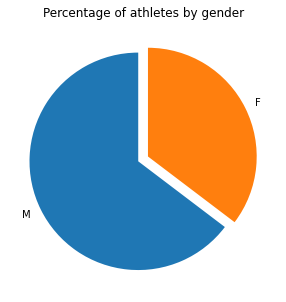

In [21]:
plt.figure(figsize=(5, 5))

plt.title('Percentage of athletes by gender')
plt.pie(yy, labels=xx, explode=(0.05, 0.05), startangle=90)

plt.savefig('plots/athletesbygender-pie.png')

## Events by gender

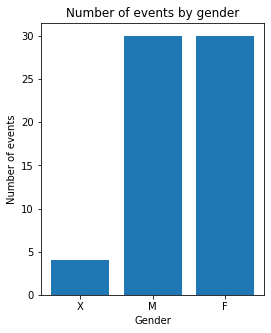

In [24]:
query = '''
SELECT COUNT(*), gender
FROM annp_final.event
GROUP BY gender;
'''

res = run_query(query)

xx = list(map(lambda x: x[1], res))
yy = list(map(lambda x: x[0], res))

plt.figure(figsize=(4, 5))

plt.title('Number of events by gender')
plt.xlabel('Gender')
plt.ylabel('Number of events')

plt.bar(xx, yy)

plt.savefig('plots/eventsbygender.png')

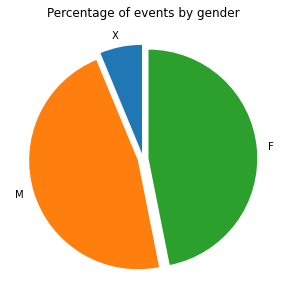

In [25]:
plt.figure(figsize=(5, 5))

plt.title('Percentage of events by gender')
plt.pie(yy, labels=xx, explode=(0.05, 0.05, 0.05), startangle=90)

plt.savefig('plots/eventsbygender-pie.png')

## Clubs by Nation

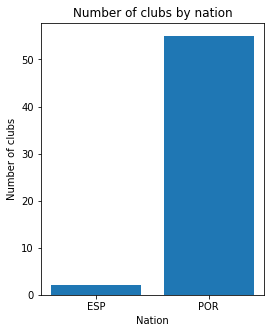

In [26]:
query = '''
SELECT nation, COUNT(*) AS nationCount
FROM annp_final.club
GROUP BY nation
ORDER BY nationCount ASC;
'''

res = run_query(query)

xx = list(map(lambda x: x[0], res))
yy = list(map(lambda x: x[1], res))

plt.figure(figsize=(4, 5))

plt.title('Number of clubs by nation')
plt.xlabel('Nation')
plt.ylabel('Number of clubs')

plt.bar(xx, yy)

plt.savefig('plots/clubsbynation.png')

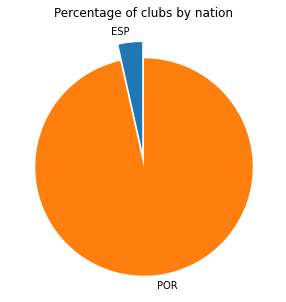

In [27]:
plt.figure(figsize=(5, 5))

plt.title('Percentage of clubs by nation')
plt.pie(yy, labels=xx, explode=(0.075, 0.075), startangle=90)

plt.savefig('plots/clubsbynation-pie.png')

## Clubs by Region (PT)

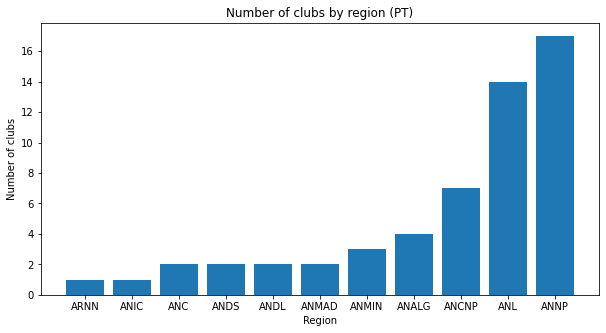

In [31]:
query = '''
SELECT region, COUNT(*) AS regionCount
FROM annp_final.club
WHERE region SIMILAR TO '[A-Z]+'
GROUP BY region
ORDER BY regionCount ASC;
'''

res = run_query(query)

xx = list(map(lambda x: x[0], res))
yy = list(map(lambda x: x[1], res))

plt.figure(figsize=(10, 5))

plt.title('Number of clubs by region (PT)')
plt.xlabel('Region')
plt.ylabel('Number of clubs')

plt.bar(xx, yy)

plt.savefig('plots/clubsbyregion-pt.png')

## Clubs by Region (ES)

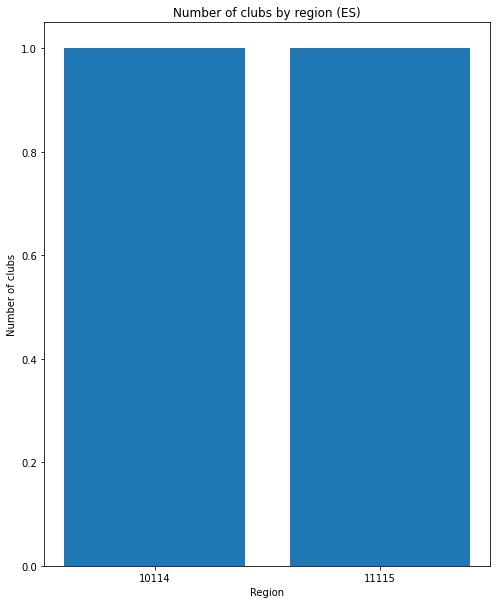

In [88]:
query = '''
SELECT region, COUNT(*) AS regionCount
FROM annp_final.club
WHERE region SIMILAR TO '[0-9]+'
GROUP BY region
ORDER BY regionCount ASC;
'''

res = run_query(query)

xx = list(map(lambda x: x[0], res))
yy = list(map(lambda x: x[1], res))

plt.figure(figsize=(8, 10))

plt.title('Number of clubs by region (ES)')
plt.xlabel('Region')
plt.ylabel('Number of clubs')

plt.bar(xx, yy)

plt.savefig('plots/clubsbyregion-es.png')

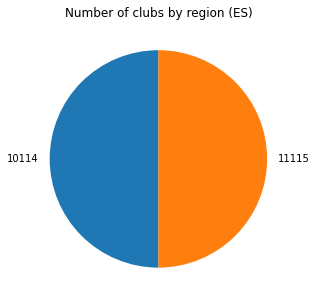

In [92]:
plt.figure(figsize=(5, 5))

plt.title('Number of clubs by region (ES)')
plt.pie(yy, labels=xx, startangle=90)

plt.savefig('plots/clubsbyregion-es-pie.png')